#### DEC7551-05655 (20232) - Tópicos Especiais I
#### Avaliação I (21/09/2023) 

##### Bruno Bortolato (20250344) e Vinicius Amaro da Rosa (18203857)

In [10]:
import numpy as np
import pandas as pd
import os
from math import sqrt
import matplotlib.pyplot as plt
from numpy import NaN
plt.rc('figure', figsize=(10, 5))

##### 1) Considerando duas listas, ou outra estrutura, que em cada posição das listas existirão valores numéricos positivos, elabore uma função para o cálculo do ângulo vetorial através da equação do cosseno, conforme equação abaixo (1,0):

A similaridade entre dois vetores não zerados pode ser calculado utilizando a medida do cosseno. A partir de dois vetores n-dimensionais, A e B, a similaridade do cosseno, cos(θ), é calculada utilizando o produto dos pontos dos dois vetores dividido pela multiplicação da norma desses vetores:<br> 
![cosine](cosine.png)

Ao final, apresente alguns exemplos de execução da função. O valor do cosseno deve ficar entre 0 e 1.

Obs: Será necessário importar a biblioteca math -> import math

In [43]:
import math

def calcular_angulo_vetorial(vetor1, vetor2):
    # Calcular o produto escalar
    produto_escalar = sum(a*b for a, b in zip(vetor1, vetor2))
    
    # Calcular as normas dos vetores
    norma_vetor1 = math.sqrt(sum(a**2 for a in vetor1))
    norma_vetor2 = math.sqrt(sum(b**2 for b in vetor2))
    
    if norma_vetor1 == 0 or norma_vetor2 == 0:     
        return 0.0
    
    # Calcular o cosseno do ângulo
    cosseno = produto_escalar / (norma_vetor1 * norma_vetor2)

    return cosseno


# Exemplo 1
vetor1 = np.random.rand(10)
vetor2 = np.random.rand(10)
cosseno = calcular_angulo_vetorial(vetor1, vetor2)
print(f"O valor do cosseno entre os vetores é aproximadamente {cosseno}.")

# Exemplo 2
vetor3 = np.random.rand(10)
vetor4 = np.random.rand(10)
cosseno = calcular_angulo_vetorial(vetor3, vetor4)
print(f"O valor do cosseno entre os vetores é aproximadamente {cosseno}.")

O valor do cosseno entre os vetores é aproximadamente 0.7021216231384984.
O valor do cosseno entre os vetores é aproximadamente 0.794430616236824.


##### 2) Considerando o conjunto de arquivos disponibilizado para esta avaliação, presentes em diferentes diretórios, elabore um código em Python que realize a carga desses arquivos de maneira iterativa e ao final integre todos os arquivos em um DataFrame (1,0):

In [44]:

dataframe = []

for i in range(1, 7):
    pasta_candidato = f'Arquivos/Questão 2/Candidato_{i}'
    caminho_arquivo = os.path.join(pasta_candidato, 'Informações de Inscrição.csv')

    if os.path.isfile(caminho_arquivo):
        df = pd.read_csv(caminho_arquivo, sep=';')
        dataframe.append(df)

df_candidatos = pd.concat(dataframe, axis=0, ignore_index=True)
print(df_candidatos)

          nome id_inscricao      curso graduacao_completa  \
0  Candidato 1   2022-02929  Doutorado                Sim   
1  Candidato 2   2022-02812  Doutorado                Sim   
2  Candidato 3   2022-19282  Doutorado                Sim   
3  Candidato 4   2022-05828   Mestrado                Sim   
4  Candidato 5   2022-08626   Mestrado                Sim   
5  Candidato 6   2022-28322   Mestrado                Sim   

  especializacao_completa mestrado_completo  trabalhos_eventos_nacionais  \
0                     Sim               Sim                            1   
1                     Não               Sim                            1   
2                     Sim               Sim                            0   
3                     Sim               Não                            1   
4                     Não               Não                            0   
5                     Sim               Não                            0   

   trabalhos_eventos_internacionais  ar

##### 3) Considerando as colunas abaixo calcule a similaridade vetorial entre todos os pares distintos de candidatos usando a função elaborada na questão 1. O resultado deve ser armazenado em um dataframe. Na sequência, para cada linha que representa um candidato, apresente o candidato mais similar com a respectiva similaridade excluindo-se o candidato de origem (1,5):

1 - trabalhos_eventos_nacionais<br>
2 - trabalhos_eventos_internacionais<br>
3 - artigos_sem_qualis<br>
4 - artigos_qualis_b5_c<br>
5 - artigos_qualis_b3_b4<br>
6 - artigos_qualis_b1_b2<br>
7 - artigos_qualis_a1_a2<br>
8 - livros_publicados<br>
9 - capitulos_livros<br>
10 - livros_organizados<br>
11 - participacao_projeto_pesquisa<br>
12 - coordenacao_projeto_pesquisa<br>
13 - software_produto_sem_registro<br>
14 - software_produto_com_registro 

In [51]:
# Colunas que serão utilizadas para calcular a similaridade
columns = [
    "trabalhos_eventos_nacionais", "trabalhos_eventos_internacionais",
    "artigos_sem_qualis", "artigos_qualis_b5_c", "artigos_qualis_b3_b4",
    "artigos_qualis_b1_b2", "artigos_qualis_a1_a2", "livros_publicados",
    "capitulos_livros", "livros_organizados", "participacao_projeto_pesquisa",
    "coordenacao_projeto_pesquisa", "software_produto_sem_registro",
    "software_produto_com_registro"
]

# Criar um DataFrame para armazenar os resultados
similarity_df = pd.DataFrame(index=df_candidatos.index, columns=df_candidatos.index)

# Calcular a similaridade para todos os pares distintos
for i in df_candidatos.index:
    for j in df_candidatos.index:
        if i != j:
            vector_i = df_candidatos.loc[i, columns].values
            vector_j = df_candidatos.loc[j, columns].values
            similarity_df.at[i, j] = calcular_angulo_vetorial(vector_i, vector_j)
        else:
            similarity_df.at[i, j] = 0  # Definir 0 para a similaridade do candidato com ele mesmo


# Formatar as linhas e colunas para começar em 1
similarity_df.index += 1
similarity_df.columns += 1

# Exibir o DataFrame
print(similarity_df)

# Encontrar o candidato mais similar para cada linha
most_similar = pd.DataFrame(index=similarity_df.index, columns=["Most_Similar", "Similarity"])

for i in similarity_df.index:
    similar_candidate = similarity_df.loc[i].idxmax()
    similarity_value = similarity_df.at[i, similar_candidate]
    most_similar.at[i, "Most_Similar"] = similar_candidate
    most_similar.at[i, "Similarity"] = similarity_value

print(most_similar)

          1         2         3         4         5         6
1         0  0.603023  0.408248    0.3849       0.5  0.755929
2  0.603023         0  0.369274  0.696311  0.301511  0.341882
3  0.408248  0.369274         0       0.0  0.408248  0.308607
4    0.3849  0.696311       0.0         0  0.288675  0.218218
5       0.5  0.301511  0.408248  0.288675         0  0.755929
6  0.755929  0.341882  0.308607  0.218218  0.755929         0


TypeError: reduction operation 'argmax' not allowed for this dtype

##### 4) Considerando os dados carregados no DataFrame da questão 2 crie uma nova coluna em que o valor deve ser calculado com base na seguinte equação (1,0):

media_final = ((nota_cv / máxima nota por curso * 10) * 0,4) + (nota_producao_bibliografica * 0,4) + (nota_producao_tecnica_tecnologica * 0,2) 

##### Considerando a nova coluna (media_final) apresente uma lista ordenada por curso e média final em ordem descresente contendo o nome do candidato, o curso, a área e a média final. O resultado deve também ser salvo em um arquivo no formato CSV.

In [46]:
def calcular_media_final(row, max_nota_por_curso):
    nota_cv = float(row['nota_cv'].replace(',', '.'))
    nota_producao_bibliografica = float(row['nota_producao_bibliografica'])
    nota_producao_tecnica_tecnologica = float(row['nota_producao_tecnica_tecnologica'])
    media_final = ((nota_cv / max_nota_por_curso[row['curso']] * 10) * 0.4) + (nota_producao_bibliografica * 0.4) + (nota_producao_tecnica_tecnologica * 0.2) 
    return media_final

df['nota_cv'] = df['nota_cv'].astype(str)

df['nota_cv'] = df['nota_cv'].str.replace(',', '.')

df['nota_cv'] = pd.to_numeric(df['nota_cv'], errors='coerce')

max_nota_por_curso = df_candidatos.groupby('curso')['nota_cv'].max()

print(max_nota_por_curso)

# Aplicar a função de cálculo a cada linha do DataFrame
df_candidatos['media_final'] = df_candidatos.apply(
    lambda row: calcular_media_final(row, max_nota_por_curso), axis=1
)

# Ordene o DataFrame por curso e média final em ordem decrescente
df_ordenado = df_candidatos.sort_values(by=['curso', 'media_final'], ascending=[True, False])

# Selecione as colunas relevantes
colunas_selecionadas = ['nome', 'curso', 'area', 'media_final']
df_resultado = df_ordenado[colunas_selecionadas]

# Salve o resultado em um arquivo CSV
nome_arquivo_saida = 'Arquivos/Questão 2/candidatos.csv'
df_resultado.to_csv(nome_arquivo_saida, index=False)

# Exiba o DataFrame resultante (opcional)
print(df_resultado)

curso
Doutorado    4,122232
Mestrado     2,893722
Name: nota_cv, dtype: object


TypeError: unsupported operand type(s) for /: 'float' and 'str'

##### 5) Considerando os dados carregados no DataFrame da questão 2 crie duas análises. A primeira, agregando (realizando a soma ou média) por curso os dados da coluna "media_final". A segunda,  utilizando o conceito de tabela de pivoteamento com função de agregação de soma em que nas linhas deve constar a coluna "curso" e nas colunas deve constar a coluna "area". Para cada uma das análise apresente também gráficos de barras ou linhas (1,0).   

In [7]:

analise1 = df_resultado.groupby('curso')['media_final'].sum()
analise1.plot(kind='bar', xlabel='Curso', ylabel='Soma da Média Final', title='Soma da Média Final por Curso')
plt.xticks(rotation=45)
plt.show()

tabela_pivot = pd.pivot_table(df_resultado, values='media_final', index='curso', columns='area', aggfunc='sum', fill_value=0)
tabela_pivot.plot(kind='bar', stacked=True, xlabel='Curso', ylabel='Soma da Média Final', title='Soma da Média Final por Curso e Área')
plt.xticks(rotation=45)
plt.show()

NameError: name 'df_resultado' is not defined

##### 6) Considerando o DataFrame da questão 2 agrege os dados das colunas tematica_1, tematica_2, tematica_3, tematica_4, tematica_5 por meio de uma contagem, de modo que, ao final, seja produzido um histograma ordenado pela frequência em ordem decrescente. Apresente as 7 temáticas mais frequentes na tela e também na forma de um gráfico de barras (1,5).

Exempo:

Temática 2 - 3<br>
Temática 4 - 2<br>
Temática 5 - 2<br>
....

In [8]:

# Concatenar as colunas tematica_1 a tematica_5 em uma única série
tematicas = pd.concat([df_candidatos['tematica_1'], df_candidatos['tematica_2'], df_candidatos['tematica_3'], df_candidatos['tematica_4'], df_candidatos['tematica_5']])

# Usar expressão regular para extrair o número da temática
tematicas = tematicas.str.extract(r'(\d+)').replace("'", "").replace(",", "").astype(int)

# Contagem das temáticas
contagem_temáticas = tematicas.value_counts()

# Selecionar as 7 temáticas mais frequentes
top_7_temáticas = contagem_temáticas.head(7)

# Gráfico de barras para as 7 temáticas mais frequentes
top_7_temáticas.plot(kind='bar', xlabel='Temática', ylabel='Frequência', title='Top 7 Temáticas Mais Frequentes')
plt.xticks(rotation=45)
plt.show()

# Apresentar as 7 temáticas mais frequentes na tela
print("As 7 temáticas mais frequentes:")
for tematica, frequencia in top_7_temáticas.items():
    print(f"Temática {tematica[0]:<3} - {frequencia}")

NameError: name 'df_candidatos' is not defined

##### 7) Carregue o arquivo movie.csv. Após isso, para cada valor distinto na coluna genres (que devem ser separados cada vez que o caracter | ocorre) gere novas colunas e incorpore ao conjunto original atribuíndo 1. Após isso recupere o conteúdo de um intervalo de linhas do conjunto de dados (1,0).

In [15]:
df = pd.read_csv('Arquivos/Questão 7/movie.csv', on_bad_lines='skip', sep=";")
df_reset=df.set_index('id')

if '|' in df.iloc[:, -1].str.cat(sep=' '):
    genres = df_reset.iloc[:, -1].str.get_dummies('|')

    df_reset = pd.concat([df_reset, genres], axis=1)

    df_reset = df_reset.drop(df.columns[-1], axis=1)

intervalo_linhas = df_reset.iloc[10:30]

print(df_reset)
print(intervalo_linhas)

                                   movie  Action  Adventure  Animation  \
id                                                                       
1                       Toy Story (1995)       0          0          1   
2                         Jumanji (1995)       0          1          0   
3                Grumpier Old Men (1995)       0          0          0   
4               Waiting to Exhale (1995)       0          0          0   
5     Father of the Bride Part II (1995)       0          0          0   
...                                  ...     ...        ...        ...   
3948             Meet the Parents (2000)       0          0          0   
3949          Requiem for a Dream (2000)       0          0          0   
3950                    Tigerland (2000)       0          0          0   
3951             Two Family House (2000)       0          0          0   
3952               Contender, The (2000)       0          0          0   

      Children's  Comedy  Crime  Docu

##### 8) Considerado o conjunto tae.csv e as bibliotecas em Python apresentadas na disciplina, elabore uma árvore de decisão. Após isso reduza a profundidade da árvore. Apresente a acurácia inicial e após a redução da profundidade. Analisando a árvore gerada apresente/escreva duas regras. O conjunto de dados representa avaliações de desempenho no ensino ao longo de alguns semestres e possui as colunas 'ta_native', 'course_instr', 'course', 'summer_regular', 'class_size' e 'label'. A coluna ‘label’ representa o atributo meta, ou seja, o objetivo da classificação (1,0). 

In [16]:
nova_coluna = ['ta_native', 'course_instr', 'course', 'summer_regular', 'class_size', 'label']
df_tae = pd.read_csv("Arquivos/Questão 8/tae.csv", header=None, names=nova_coluna)
df_tae.head()

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

X = df_tae[['ta_native', 'course_instr', 'course', 'summer_regular', 'class_size']]
y = df_tae['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)

tree_classifier = DecisionTreeClassifier(random_state=1)

tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

tree_classifier_reduced = DecisionTreeClassifier(max_depth=3, random_state=1)

tree_classifier_reduced.fit(X_train, y_train)

y_pred_reduced = tree_classifier_reduced.predict(X_test)

reduced_accuracy = metrics.accuracy_score(y_test, y_pred_reduced)

print(f"Acurácia após Redução: {reduced_accuracy}")



Accuracy: 0.639344262295082
Acurácia após Redução: 0.5081967213114754


##### 9) Utilizando o conjunto de dados (wine.csv) e as bibliotecas em Python apresentadas na disciplina, elabore um algoritmo de aprendizado de máquina do tipo Random Forest. Apresenta a acurácia inicial do modelo. Na sequência calcule a contribuição de cada característica e realize novamente o treinamento e o teste sem algumas das características menos importantes, apresentando no final a nova acurácia (1,0). 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

wine = datasets.load_wine()

print(wine.target_names)

print(wine.feature_names)

print(wine.data[0:5])

print(wine.target)


X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred=random_forest.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

In [36]:

# Cria o classificador
clf=RandomForestClassifier(n_estimators=100)

# Treina o modelo usando os conjuntos de treinamento (características e rótulo para predição)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
#n_jobs=2
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(max_features='auto', n_jobs=2)

In [40]:
print(wine.feature_names)
feature_imp = pd.Series(clf.feature_importances_,index=wine.feature_names).sort_values(ascending=False)
feature_imp

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


proline                         0.168602
color_intensity                 0.141152
alcohol                         0.140656
od280/od315_of_diluted_wines    0.134560
flavanoids                      0.123982
hue                             0.109608
total_phenols                   0.051669
magnesium                       0.038119
malic_acid                      0.022111
alcalinity_of_ash               0.021715
proanthocyanins                 0.020276
ash                             0.018087
nonflavanoid_phenols            0.009464
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


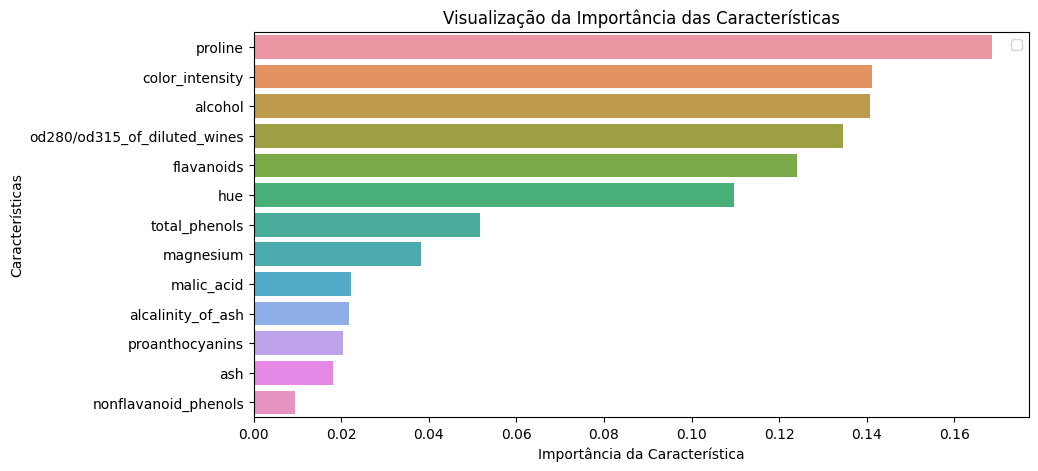

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Cria um plotagem de barra
sns.barplot(x=feature_imp, y=feature_imp.index)
# Adiciona rótulos para o gráfico
plt.xlabel('Importância da Característica')
plt.ylabel('Características')
plt.title("Visualização da Importância das Características")
plt.legend()
plt.show()

##### 10) Questão adicional - Utilizando alguma API obtenha dados de fontes que contenham dados abertos, tais como, redes sociais ou web sites. A partir disso, realize as devidas transformações para que os dados coletados sejam estruturados em um DataFrame do Pandas. Com os dados estruturados utilize alguma função de agregação (soma, média, contagem) projetando o resultado por meio de algum gráfico (1,0). Obs: recupere somente dados que estejam disponíveis por meio da API utilizada. 